<br>

<center><img src="https://www.htu.edu.jo/images/ThumbnailsCoverPhotos/HTU%20Logo-250px.png" alt="HTU"  width="180px" align="center">


<br>

<p>

**Deep Learning**

10204450

Section (3)

**Developing a deep learning-based system - Part 1**

**Submitted to**

Dr. Ala'a Al-Habashna

**Submitted on**

June 13th, 2024

**Submitted by**

Marwan Tarek Shafiq Al Farah

**Student ID**

21110011

Spring 2023 – 2024
</p></center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Neural Network from Sratch**

## **Importing Libraries**

In [ ]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device:", device)

Device: cuda


## **Defining Classes**

In [ ]:
class LinearLayer:
    def __init__(self, input_size, output_size):
        self.weights = torch.randn(input_size, output_size, requires_grad=True, device=device)
        self.bias = torch.randn(output_size, requires_grad=True, device=device)

    def forward(self, x):
        return x @ self.weights + self.bias

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        self.fc1 = LinearLayer(input_size, hidden_size1)
        self.fc2 = LinearLayer(hidden_size1, hidden_size2)
        self.fc3 = LinearLayer(hidden_size2, output_size)

    def forward(self, x):
        x = self.relu(self.fc1.forward(x))
        x = self.relu(self.fc2.forward(x))
        x = self.fc3.forward(x)
        return x

    def predict(self, x):
        with torch.no_grad():
            return self.forward(x)

    def relu(self, x):
        return torch.maximum(torch.tensor(0.0, device=device), x)

    def mse_loss(self, predictions, targets):
        return ((predictions - targets) ** 2).mean()

    def r2_score(self, predictions, targets):
        ss_total = ((targets - targets.mean()) ** 2).sum()
        ss_residual = ((targets - predictions) ** 2).sum()
        r2 = 1 - (ss_residual / ss_total)
        return r2

## **Loading the Dataset and Preparing the Features and Target Variables**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/california_housing_dataset.csv')

In [ ]:
df = df.drop("Unnamed: 0", axis = 1)

In [ ]:
X = df.drop("Target", axis = 1)
y = df["Target"]

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X = torch.Tensor(X).to(device)
y = torch.Tensor(y).view(-1, 1).to(device)

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

## **Define the Network Hyperparameters**

In [ ]:
input_size = X.shape[1]
hidden_size1 = 5
hidden_size2 = 5
output_size = 1

## **Defining the Network**

In [ ]:
net = NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

## **Training Hyperparameters**

In [ ]:
learning_rate = 0.02
epochs = 100000

## **Training the Neural Network**

In [ ]:
train_losses = []
val_losses = []
train_r2_scores = []
val_r2_scores = []

In [ ]:
for epoch in range(epochs):
    y_pred_train = net.forward(X_train)
    loss = net.mse_loss(y_pred_train, y_train)
    loss.backward()

    with torch.no_grad():
        net.fc1.weights -= learning_rate * net.fc1.weights.grad
        net.fc1.bias -= learning_rate * net.fc1.bias.grad
        net.fc2.weights -= learning_rate * net.fc2.weights.grad
        net.fc2.bias -= learning_rate * net.fc2.bias.grad
        net.fc3.weights -= learning_rate * net.fc3.weights.grad
        net.fc3.bias -= learning_rate * net.fc3.bias.grad

        net.fc1.weights.grad.zero_()
        net.fc1.bias.grad.zero_()
        net.fc2.weights.grad.zero_()
        net.fc2.bias.grad.zero_()
        net.fc3.weights.grad.zero_()
        net.fc3.bias.grad.zero_()

    r2_train = net.r2_score(y_pred_train, y_train)
    y_pred_val = net.forward(X_val)
    val_loss = net.mse_loss(y_pred_val, y_val)
    r2_val = net.r2_score(y_pred_val, y_val)

    if (epoch+1) % 1000 == 0 or epoch == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}, R² (train): {r2_train.item()}, Val Loss: {val_loss.item()}, R² (val): {r2_val.item()}')

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_r2_scores.append(r2_train.item())
    val_r2_scores.append(r2_val.item())

Epoch 1/100000, Loss: 0.3084830641746521, R² (train): 0.7673313021659851, Val Loss: 0.33742645382881165, R² (val): 0.7554859519004822
Epoch 1000/100000, Loss: 0.30845651030540466, R² (train): 0.7673513293266296, Val Loss: 0.3373726010322571, R² (val): 0.7555249929428101
Epoch 2000/100000, Loss: 0.308433473110199, R² (train): 0.7673686742782593, Val Loss: 0.33733442425727844, R² (val): 0.7555526494979858
Epoch 3000/100000, Loss: 0.30841484665870667, R² (train): 0.7673827409744263, Val Loss: 0.33730193972587585, R² (val): 0.7555761933326721
Epoch 4000/100000, Loss: 0.3083855211734772, R² (train): 0.7674048542976379, Val Loss: 0.3371218144893646, R² (val): 0.7557066679000854
Epoch 5000/100000, Loss: 0.30835938453674316, R² (train): 0.7674245834350586, Val Loss: 0.33709484338760376, R² (val): 0.7557262182235718
Epoch 6000/100000, Loss: 0.30833700299263, R² (train): 0.76744145154953, Val Loss: 0.33704450726509094, R² (val): 0.7557626962661743
Epoch 7000/100000, Loss: 0.3083156645298004, R² 

## **Evaluating the Model's Performance**

In [ ]:
y_pred_train = net.predict(X_train)
train_r2 = net.r2_score(y_pred_train, y_train)
train_loss = net.mse_loss(y_pred_train, y_train)
print("Train Loss:", train_loss.item())
print("Train R² score:", train_r2.item())

Train Loss: 0.3068311810493469
Train R² score: 0.7685772180557251


In [ ]:
y_pred_val = net.predict(X_val)
val_r2 = net.r2_score(y_pred_val, y_val)
val_loss = net.mse_loss(y_pred_val, y_val)
print("Validation Loss:", val_loss.item())
print("Validation R² score:", val_r2.item())

Validation Loss: 0.3356185853481293
Validation R² score: 0.7567960023880005


In [ ]:
y_pred_test = net.predict(X_test)
test_r2 = net.r2_score(y_pred_test, y_test)
test_loss = net.mse_loss(y_pred_test, y_test)
print("Test Loss:", test_loss.item())
print("Test R² score:", test_r2.item())

Test Loss: 0.3188648223876953
Test R² score: 0.7566677331924438


## **Plotting the Learning Curve**

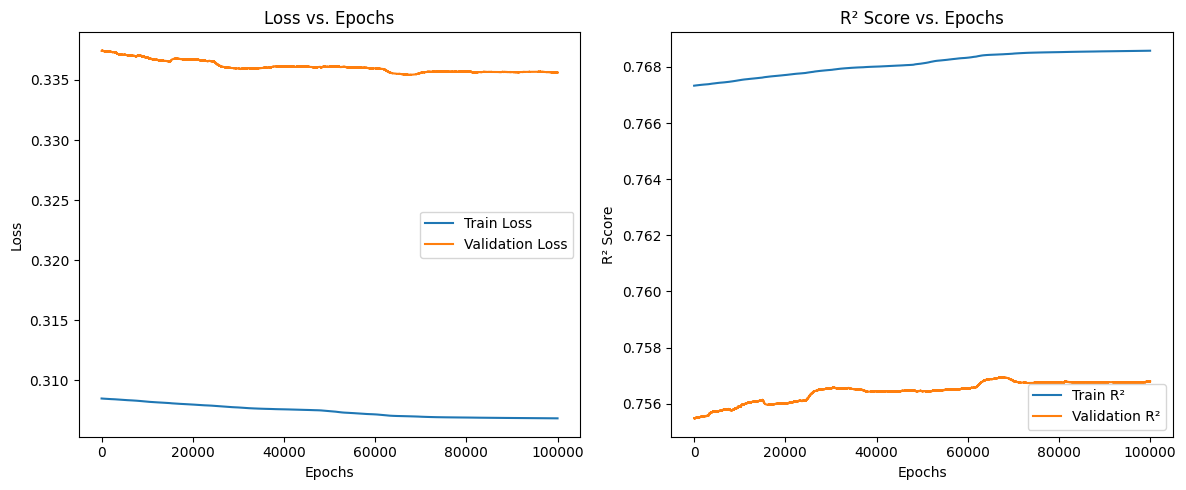

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_r2_scores) + 1), train_r2_scores, label='Train R²')
plt.plot(range(1, len(val_r2_scores) + 1), val_r2_scores, label='Validation R²')
plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.title('R² Score vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# **Neural Network using torch.nn**

## **Importing Libraries**

In [ ]:
import torch.nn as nn
import torch.optim as optim

## **Defining Classes**

In [ ]:
class NeuralNetworkNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(NeuralNetworkNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## **Defining the Network**

In [ ]:
net_nn = NeuralNetworkNN(input_size, hidden_size1, hidden_size2, output_size).to(device)

## **Defining the Loss Function and the Optimizer**

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.SGD(net_nn.parameters(), lr=learning_rate)

## **Training the Neural Network**

In [ ]:
train_losses_nn = []
val_losses_nn = []
train_r2_scores_nn = []
val_r2_scores_nn = []

In [ ]:
for epoch in range(epochs):
        net_nn.train()
        optimizer.zero_grad()
        y_pred_train_nn = net_nn(X_train)
        loss_nn = criterion(y_pred_train_nn, y_train)
        loss_nn.backward()
        optimizer.step()


        net_nn.eval()
        with torch.no_grad():
            y_pred_train_nn = net_nn(X_train)
            r2_train_nn = 1 - torch.sum((y_train - y_pred_train_nn) ** 2) / torch.sum((y_train - torch.mean(y_train)) ** 2)
            y_pred_val_nn = net_nn(X_val)
            val_loss_nn = criterion(y_pred_val_nn, y_val)
            r2_val_nn = 1 - torch.sum((y_val - y_pred_val_nn) ** 2) / torch.sum((y_val - torch.mean(y_val)) ** 2)

            if (epoch + 1) % 1000 == 0 or epoch == 0:
                print(f'Epoch {epoch+1}/{epochs}, Loss: {loss_nn.item()}, R² (train): {r2_train_nn.item()}, Val Loss: {val_loss_nn.item()}, R² (val): {r2_val_nn.item()}')

            train_losses_nn.append(loss_nn.item())
            val_losses_nn.append(val_loss_nn.item())
            train_r2_scores_nn.append(r2_train_nn.item())
            val_r2_scores_nn.append(r2_val_nn.item())

Epoch 1/100000, Loss: 0.40399590134620667, R² (train): 0.6953035593032837, Val Loss: 0.43790918588638306, R² (val): 0.6826717257499695
Epoch 1000/100000, Loss: 0.3896428644657135, R² (train): 0.7061260342597961, Val Loss: 0.42515429854393005, R² (val): 0.691914439201355
Epoch 2000/100000, Loss: 0.3811844289302826, R² (train): 0.7125027775764465, Val Loss: 0.4170152544975281, R² (val): 0.6978123784065247
Epoch 3000/100000, Loss: 0.37446674704551697, R² (train): 0.7175688147544861, Val Loss: 0.40943920612335205, R² (val): 0.7033023238182068
Epoch 4000/100000, Loss: 0.36808133125305176, R² (train): 0.7223849296569824, Val Loss: 0.4042280614376068, R² (val): 0.7070785760879517
Epoch 5000/100000, Loss: 0.36219483613967896, R² (train): 0.7268246412277222, Val Loss: 0.3982240557670593, R² (val): 0.7114292979240417
Epoch 6000/100000, Loss: 0.3565867841243744, R² (train): 0.7310535907745361, Val Loss: 0.3929307758808136, R² (val): 0.7152650356292725
Epoch 7000/100000, Loss: 0.352580189704895, R

## **Evaluating the Model's Performance**

In [ ]:
net_nn.eval()
with torch.no_grad():
    y_pred_train_nn = net_nn(X_train)
    train_loss_nn = criterion(y_pred_train_nn, y_train)
    train_r2_nn = 1 - torch.sum((y_train - y_pred_train_nn) ** 2) / torch.sum((y_train - torch.mean(y_train)) ** 2)
    print("Train Loss:", train_loss_nn.item())
    print("Train R² score:", train_r2_nn.item())

Train Loss: 0.3111151158809662
Train R² score: 0.765346109867096


In [ ]:
net_nn.eval()
with torch.no_grad():
    y_pred_val_nn = net_nn(X_val)
    val_loss_nn = criterion(y_pred_val_nn, y_val)
    val_r2_nn = 1 - torch.sum((y_val - y_pred_val_nn) ** 2) / torch.sum((y_val - torch.mean(y_val)) ** 2)
    print("Validation Loss:", val_loss_nn.item())
    print("Validation R² score:", val_r2_nn.item())

Validation Loss: 0.34586721658706665
Validation R² score: 0.7493693828582764


In [ ]:
with torch.no_grad():
    y_pred_test_nn = net_nn(X_test)
    test_loss_nn = criterion(y_pred_test_nn, y_test)
    test_r2_nn = 1 - torch.sum((y_test - y_pred_test_nn) ** 2) / torch.sum((y_test - torch.mean(y_test)) ** 2)
    print("Test Loss:", test_loss_nn.item())
    print("Test R² score:", test_r2_nn.item())

Test Loss: 0.3279517590999603
Test R² score: 0.7497332692146301


## **Plotting the Learning Curve**

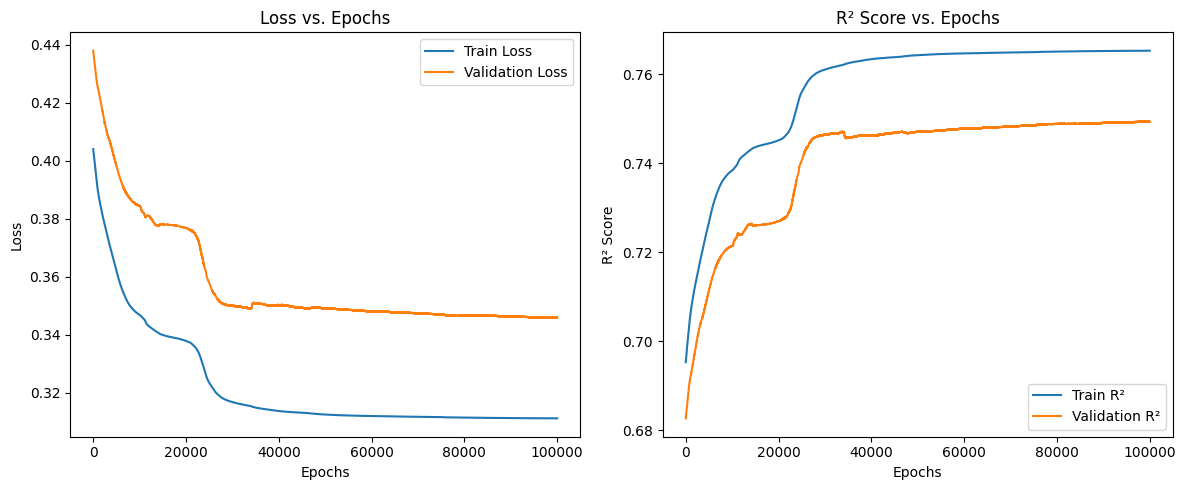

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses_nn) + 1), train_losses_nn, label='Train Loss')
plt.plot(range(1, len(val_losses_nn) + 1), val_losses_nn, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_r2_scores_nn) + 1), train_r2_scores_nn, label='Train R²')
plt.plot(range(1, len(val_r2_scores_nn) + 1), val_r2_scores_nn, label='Validation R²')
plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.title('R² Score vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()